# Data Science Coding Task
* The objective of this challenge is to prepare a model for predicting the payout time of a loan request. 
* The motivation for doing this is to be more transparent and provide accurate information to our customers. So when a customer is applying for a loan they will see the payout date for each loan offers and can make an informed decision based on this information.
* Payout date is the date when the customer will receive the money in his/her bank account.

# General Instructions
* There are total 3 tasks and each task has a few subtasks.
* All the tasks should be completed within 5 hours.
* Programming should be done in Python. You can use any libraries you want. But make sure that the installation commands are provided in the notebook.
* Please provide your solution in this notebook below each task. 
* Please provide both ipynb and html version of the notebook with all the outputs and plots.
* Please document your code.
* Please document the assumptions you made.

# Description of the dataset
Some general information about the dataset:
* Each row in the dataset represents a loan application along with the customer data that applied for the loan.
* There are two types of loans instant loans and normal loans. Instant loans doesn't require document submission. Normal loans require document submission. The activity from the customer's side is considered finished when the documents are submitted for normal loans and when the identification check is finished for instant loans.

The dataset contains the following columns:
* `esignature_allowed`: Virtual signing of documents is allowed or not.
* `instant_loan_possible`: Whether it's an instant loan or not. An instant loan generally gets closed on the same day.
* `known_to_bank`: Whether this applicant is already know to bank or not.
* `total_expense`: Total expense of the applicant per month.
* `total_income`: Total income of the applicant per month.
* `loan_creation_time`: The time at which loan application was created in check24 system.
* `effective_interest_rate`: Interest rate of the loan.
* `loan_amount`: Loan amount of the application.
* `loan_monthly_installment`: Monthly installments that has to be paid.
* `bank_id`: Bank id against which the loan is available
* `purpose`: Purpose for which loan was booked.
* `marital_status`: Marital status of the applicant.
* `occupation_group`: Occupation group of the applicant.
* `branch`: Industry in which applicant works.
* `identification_started_at`: Time at which identification check was started.
* `identification_completed_at`: Time at which identification check was completed.
* `bank_closed_offer_at`: Time at which bank closed the loan offer.
* `bank_received_doc_first_at`: Time at which bank received the first document.
* `new_document_count`: Number of new documents asked by the banks after the process started.
* `initial_document_count`: Number of initial documents asked by the banks.
* `applicant_submitted_doc_at`: Time at which applicant submitted the documents to check24.

# Task 1

### Load the dataset 
* Do you feel the dataset is clean? If not, what are the issues you see in the dataset and how would you clean it?

In [1]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
pd.set_option('display.max_columns', None)
print(df.head())

   esignature_allowed  instant_loan_possible  known_to_bank  living_cost  \
0                   0                      0              0       1050.0   
1                   1                      0              0       1400.0   
2                   1                      0              0       2050.0   
3                   1                      0              0        700.0   
4                   1                      0              0       2400.0   

   total_expense  total_income       loan_creation_time  \
0         1850.0        2514.0  2023-04-02 07:29:51.592   
1         1480.0        4300.0  2023-10-20 14:03:01.299   
2         2340.0        3940.0  2023-04-17 16:13:33.808   
3         1540.0        2850.0  2022-08-07 17:40:19.826   
4         4775.0        5200.0  2023-03-12 10:20:55.332   

   effective_interest_rate  total_loan_amount  loan_amount  loan_duration  \
0                     5.99            3162.85         2384           18.0   
1                    10.09        

In [2]:
df.columns

Index(['esignature_allowed', 'instant_loan_possible', 'known_to_bank',
       'living_cost', 'total_expense', 'total_income', 'loan_creation_time',
       'effective_interest_rate', 'total_loan_amount', 'loan_amount',
       'loan_duration', 'loan_monthly_installment', 'bank_id', 'product_id',
       'purpose', 'nationality', 'marital_status', 'occupation_group',
       'branch', 'identification_started_at', 'identification_completed_at',
       'bank_closed_offer_at', 'bank_received_doc_first_at',
       'new_document_count', 'initial_document_count',
       'applicant_submitted_doc_at'],
      dtype='object')

In [3]:
df.shape

(27259, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   esignature_allowed           27259 non-null  int64  
 1   instant_loan_possible        27259 non-null  int64  
 2   known_to_bank                27259 non-null  int64  
 3   living_cost                  26219 non-null  float64
 4   total_expense                26219 non-null  float64
 5   total_income                 26219 non-null  float64
 6   loan_creation_time           26219 non-null  object 
 7   effective_interest_rate      26219 non-null  float64
 8   total_loan_amount            26219 non-null  float64
 9   loan_amount                  27259 non-null  int64  
 10  loan_duration                26219 non-null  float64
 11  loan_monthly_installment     26219 non-null  float64
 12  bank_id                      27259 non-null  int64  
 13  product_id      

In [5]:
df.describe()

,esignature_allowed,instant_loan_possible,known_to_bank,living_cost,total_expense,total_income,effective_interest_rate,total_loan_amount,loan_amount,loan_duration,loan_monthly_installment,bank_id,product_id,marital_status,new_document_count,initial_document_count
count,27259.000000,27259.000000,27259.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,27259.000000,26219.000000,26219.000000,27259.000000,26219.000000,26219.000000,3817.000000,15328.000000
mean,0.827983,0.303569,0.140284,1517.050612,2135.445135,3301.567963,8.161874,18172.984155,2005.495763,64.033792,272.297403,749.604681,504.828979,1.958808,2.007860,1.724556
std,0.377402,0.459807,0.347288,651.722019,854.064897,1688.568706,3.536487,18260.508646,578.606283,29.699981,217.912189,144.262220,175.452278,1.228143,1.816516,1.047420
min,0.000000,0.000000,0.000000,700.000000,700.000000,563.000000,0.000000,0.000000,1000.000000,1.000000,13.380000,500.000000,38.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,1000.000000,1500.000000,2279.000000,5.940000,5667.840000,1505.000000,36.000000,124.110000,624.000000,354.000000,1.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1400.000000,2014.000000,2874.000000,6.750000,12092.600000,2011.000000,60.000000,216.630000,750.000000,519.000000,2.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,2050.000000,2697.500000,3888.500000,9.890000,24426.555000,2505.000000,84.000000,351.365000,874.000000,645.000000,2.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,5500.000000,19198.000000,56388.000000,19.920000,145491.580000,3000.000000,240.000000,5201.500000,1000.000000,797.000000,6.000000,24.000000,12.000000


Check for duplicates in the data and eliminate them

In [6]:
df.duplicated().sum()

0

There are no duplicates showing each data entry is unique

Check for nulls and identify where the data is missing

In [7]:
df.isna().sum()

esignature_allowed                 0
instant_loan_possible              0
known_to_bank                      0
living_cost                     1040
total_expense                   1040
total_income                    1040
loan_creation_time              1040
effective_interest_rate         1040
total_loan_amount               1040
loan_amount                        0
loan_duration                   1040
loan_monthly_installment        1040
bank_id                            0
product_id                      1040
purpose                         1040
nationality                     1040
marital_status                  1040
occupation_group                1040
branch                          1040
identification_started_at       8048
identification_completed_at     8535
bank_closed_offer_at               0
bank_received_doc_first_at     13698
new_document_count             23442
initial_document_count         11931
applicant_submitted_doc_at     14712
dtype: int64

In [8]:
df.loc[df.living_cost.isna()]

,esignature_allowed,instant_loan_possible,known_to_bank,living_cost,total_expense,total_income,loan_creation_time,effective_interest_rate,total_loan_amount,loan_amount,loan_duration,loan_monthly_installment,bank_id,product_id,purpose,nationality,marital_status,occupation_group,branch,identification_started_at,identification_completed_at,bank_closed_offer_at,bank_received_doc_first_at,new_document_count,initial_document_count,applicant_submitted_doc_at
18,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2754,NaN,NaN,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-14 16:01:50.376,2021-10-03 15:15:03.637,3.0,NaN,2021-10-04 09:24:55
80,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1130,NaN,NaN,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-19 09:30:34.022,2023-12-01 17:43:33.480,10.0,5.0,2023-12-06 15:44:24
337,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2662,NaN,NaN,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 14:14:51.772,2023-06-01 07:14:18.665,1.0,2.0,NaN
339,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2428,NaN,NaN,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-15 11:54:28.454,2021-07-14 13:39:05.937,2.0,2.0,NaN
357,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2612,NaN,NaN,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 11:57:03.389,2021-09-24 09:59:08.987,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26977,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,2510,NaN,NaN,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-15 13:29:47.693,2023-11-15 12:36:30.032,NaN,1.0,NaN
27144,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1171,NaN,NaN,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12 13:58:17.498,2022-08-12 13:47:59.863,NaN,1.0,NaN
27164,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2482,NaN,NaN,708,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-25 11:48:30.463858262,2022-06-25 11:57:37.086371408,2022-06-26 15:16:17.379,2022-06-25 14:15:04.573,NaN,NaN,NaN
27191,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2608,NaN,NaN,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-19 21:30:01.707,NaN,NaN,NaN,NaN


In [9]:
missing_count = df.living_cost.isna() == df.total_loan_amount.isna()
print(missing_count.sum())

27259


The above analysis shows that the rows with the missing data are the same and with no further information can be dropped since they would not help further analysist

In [10]:
df1 = df.dropna(subset = ['living_cost'])

In [11]:
df1.isna().sum()

esignature_allowed                 0
instant_loan_possible              0
known_to_bank                      0
living_cost                        0
total_expense                      0
total_income                       0
loan_creation_time                 0
effective_interest_rate            0
total_loan_amount                  0
loan_amount                        0
loan_duration                      0
loan_monthly_installment           0
bank_id                            0
product_id                         0
purpose                            0
nationality                        0
marital_status                     0
occupation_group                   0
branch                             0
identification_started_at       7388
identification_completed_at     7844
bank_closed_offer_at               0
bank_received_doc_first_at     13530
new_document_count             22779
initial_document_count         11759
applicant_submitted_doc_at     13757
dtype: int64

The data is almost clean we now would investigate where the other missing values are at 

In [12]:
df1.instant_loan_possible.value_counts()

instant_loan_possible
0    17999
1     8220
Name: count, dtype: int64

In [13]:
df1[['instant_loan_possible','identification_started_at','identification_completed_at', 'initial_document_count']]

,instant_loan_possible,identification_started_at,identification_completed_at,initial_document_count
0,0,NaN,NaN,3.0
1,0,NaN,NaN,2.0
2,0,2023-04-18 10:21:37.784729070,2023-04-18 10:30:43.853198562,1.0
3,0,2022-08-07 20:18:04.051031072,2022-08-07 20:25:45.651215098,1.0
4,0,NaN,NaN,2.0
...,...,...,...,...
27254,0,2022-04-04 23:53:20.260376532,2022-04-05 00:03:38.846555560,NaN
27255,0,NaN,NaN,NaN
27256,0,2022-09-03 18:56:45.405885145,2022-09-03 19:13:01.346827569,NaN
27257,0,NaN,NaN,NaN


In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt

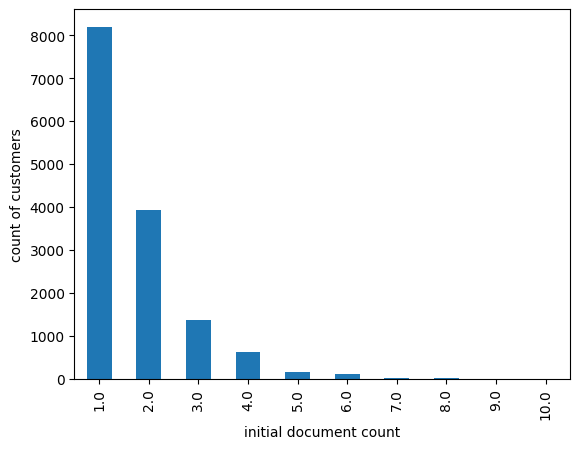

In [15]:
df1.initial_document_count.value_counts().plot(kind = 'bar')
plt.ylabel('count of customers')
plt.xlabel('initial document count')
plt.show()

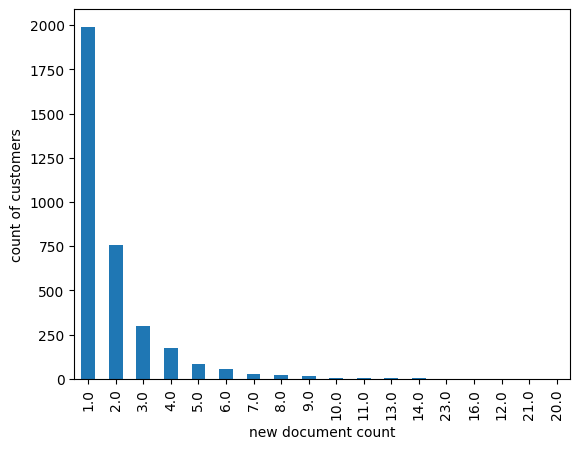

In [16]:
df1.new_document_count.value_counts().plot(kind = 'bar')
plt.ylabel('count of customers')
plt.xlabel('new document count')
plt.show()

It is safe to assume that there are no 0 values updated and maybe if the loans were of type instant then the banks would not have asked for any type of documents and we can impute the values of 0 to the Nans

In [17]:
df1.initial_document_count = df1.initial_document_count.fillna(0)
df1.new_document_count = df1.new_document_count.fillna(0)

C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\307910414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.initial_document_count = df1.initial_document_count.fillna(0)
C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\307910414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.new_document_count = df1.new_document_count.fillna(0)


In [18]:
df1.loc[df.applicant_submitted_doc_at.isna(),['instant_loan_possible','bank_received_doc_first_at']]

,instant_loan_possible,bank_received_doc_first_at
192,1,NaN
193,1,NaN
194,1,NaN
195,1,NaN
196,1,NaN
...,...,...
27254,0,2022-04-05 00:03:17.964
27255,0,NaN
27256,0,NaN
27257,0,NaN


In [19]:
df1.loc[df1.initial_document_count.isna(),['instant_loan_possible', 'initial_document_count', 'new_document_count']]

,instant_loan_possible,initial_document_count,new_document_count


Since the loans are of 2 types either instant or normal where the payout time is the difference between bank_closed_offer_at - identification_check_completed_at for instant loans and bank_closed_offer_at - applicant_submitted_doc_at for normal loans 
if there is no data in either of the columns then the target variable cannot be computed so it is safe to drop them when both are absent simulatenously

In [20]:
df2 = df1.dropna(subset=['applicant_submitted_doc_at', 'identification_completed_at'], how='all')

In [21]:
df2.loc[df2.identification_completed_at.isna(), ['applicant_submitted_doc_at']]

,applicant_submitted_doc_at
0,2023-04-27 14:08:13
1,2023-10-20 14:08:31
4,2023-03-24 21:11:13
6,2023-01-26 10:41:26
7,2022-10-30 14:39:15
...,...
26911,2021-08-29 09:51:57
26914,2022-02-02 09:51:30
26928,2022-01-27 09:41:51
27081,2022-05-15 13:32:05


In [22]:
df2.loc[df2.applicant_submitted_doc_at.isna(), ['identification_started_at','identification_completed_at']]

,identification_started_at,identification_completed_at
192,2023-03-26 13:52:29.976725919,2023-03-26 13:58:02.339510251
193,2021-09-20 18:22:57.960383221,2021-09-20 18:35:40.842648780
195,2021-08-07 17:45:30.539041949,2021-08-07 17:51:38.768418990
196,2022-12-12 08:04:52.292442616,2022-12-12 08:13:09.775615765
197,2022-06-30 15:07:55.108082293,2022-06-30 15:16:04.130633376
...,...,...
27230,2023-03-18 16:37:01.146539211,2023-03-18 16:45:31.935518931
27248,2021-09-07 11:53:54.256539648,2021-09-07 12:02:47.775355387
27254,2022-04-04 23:53:20.260376532,2022-04-05 00:03:38.846555560
27256,2022-09-03 18:56:45.405885145,2022-09-03 19:13:01.346827569


We see that the data is clean now with the understanding that if the loan was instant the no applications were submitted and if the loan was normal identifcation checks were not done

In [23]:
df2.loc[(df2['applicant_submitted_doc_at'].notna()) & (df2['identification_started_at'].isna()) & (df2['identification_completed_at'].isna()), ['identification_started_at', 'identification_completed_at']] = 0


In [24]:
df2.loc[(df2['identification_completed_at'].notna()) & (df2['applicant_submitted_doc_at'].isna()),  ['applicant_submitted_doc_at']] = 0


The bank first receiving offer at is a client side problem and we have no access to it but it does not affect our analysis since we need to only know closing time from the bank so we fill the receiving time with 0 and drop all other nans 

In [25]:
df2.loc[df.bank_received_doc_first_at.isna(), 'bank_received_doc_first_at'] = 0

In [26]:
df3 = df2.dropna()

In [27]:
df3.isna().sum().sum()

0

Now we have a clean data set and we can introduce a new categorical variable called is_instant = 1 means it is an instant loan and is_instant = 0 means it is normal

In [28]:
df3.loc[df3['applicant_submitted_doc_at'] != 0, 'is_instant'] = 0
df3.loc[df3['identification_started_at'] != 0, 'is_instant'] = 1


C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\955743392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3['applicant_submitted_doc_at'] != 0, 'is_instant'] = 0


In [29]:
df3.is_instant.value_counts()

is_instant
1.0    18361
0.0     2098
Name: count, dtype: int64

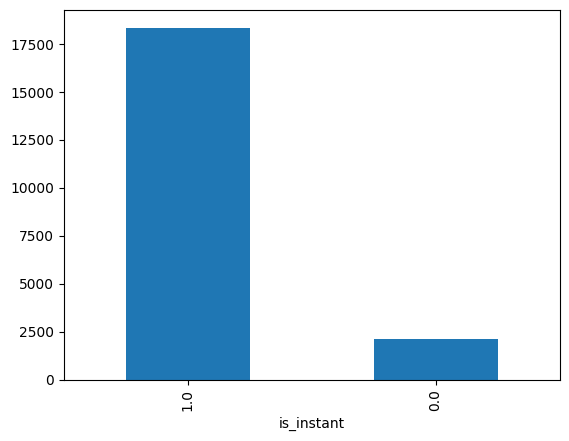

In [30]:
df3.is_instant.value_counts().plot(kind = 'bar')
plt.show()

In [31]:
df3.shape[0]

20459

### Compute the payout time for each loan application
Payout time is the difference between the loan closing date and the date when the applicants finished doing their part like - submitted their documents or finished their identification check. It is computed in days. The activity from the customer's side is considered finished when the documents are submitted for normal loans and when the identification check is finished for instant loans.

In [32]:
# remove the time stamp
df3.identification_started_at = df3.identification_started_at.str.split().str[0]
df3.identification_completed_at = df3.identification_completed_at.str.split().str[0]
df3.applicant_submitted_doc_at = df3.applicant_submitted_doc_at.str.split().str[0]
df3.bank_closed_offer_at = df3.bank_closed_offer_at.str.split().str[0]
df3.bank_received_doc_first_at = df3.bank_received_doc_first_at.str.split().str[0]

C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\464800524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.identification_started_at = df3.identification_started_at.str.split().str[0]
C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\464800524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.identification_completed_at = df3.identification_completed_at.str.split().str[0]
C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\464800524.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [33]:
## convert the data to appropriate date types
df3.applicant_submitted_doc_at = pd.to_datetime(df3.applicant_submitted_doc_at,  errors='coerce')
df3.identification_started_at = pd.to_datetime(df3.identification_started_at, errors='coerce')
df3.identification_completed_at = pd.to_datetime(df3.identification_completed_at, errors='coerce')
df3.bank_closed_offer_at = pd.to_datetime(df3.bank_closed_offer_at)
df3.bank_received_doc_first_at = pd.to_datetime(df3.bank_received_doc_first_at,  errors='coerce')

C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\872667155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.applicant_submitted_doc_at = pd.to_datetime(df3.applicant_submitted_doc_at,  errors='coerce')
C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\872667155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.identification_started_at = pd.to_datetime(df3.identification_started_at, errors='coerce')
C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\872667155.py:4: SettingWithCopyWarning: 
A va

In [34]:
df3.dtypes

esignature_allowed                      int64
instant_loan_possible                   int64
known_to_bank                           int64
living_cost                           float64
total_expense                         float64
total_income                          float64
loan_creation_time                     object
effective_interest_rate               float64
total_loan_amount                     float64
loan_amount                             int64
loan_duration                         float64
loan_monthly_installment              float64
bank_id                                 int64
product_id                            float64
purpose                                object
nationality                            object
marital_status                        float64
occupation_group                       object
branch                                 object
identification_started_at      datetime64[ns]
identification_completed_at    datetime64[ns]
bank_closed_offer_at           dat

In [35]:
def calculate_payout_time(row):
    if row['is_instant'] == 1 and row['identification_completed_at'] is not pd.NaT:
        delta = row['bank_closed_offer_at'] - row['identification_completed_at']
        return delta.days 
    elif row['is_instant'] == 0 and row['applicant_submitted_doc_at'] is not pd.NaT:
        delta = row['bank_closed_offer_at'] - row['applicant_submitted_doc_at']
        return delta.days 
    else:
        return -1  # Return -1 for rows with missing datetime values

# Apply the function to calculate payout_time
df3['payout_time'] = df3.apply(calculate_payout_time, axis=1)



C:\Users\nihal\AppData\Local\Temp\ipykernel_24836\1990995070.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['payout_time'] = df3.apply(calculate_payout_time, axis=1)


In [36]:
df3.loc[0].identification_completed_at is pd.NaT

True

In [37]:
df3.loc[df3.payout_time < 0 , ['is_instant', 'identification_completed_at','applicant_submitted_doc_at', 'bank_closed_offer_at','payout_time']]

,is_instant,identification_completed_at,applicant_submitted_doc_at,bank_closed_offer_at,payout_time
1501,1.0,2022-06-12,NaT,2022-06-11,-1
6708,1.0,2023-06-26,2023-06-25,2023-06-25,-1
10152,1.0,2022-09-02,2022-09-01,2022-09-01,-1
11754,1.0,2022-10-25,2022-10-24,2022-10-24,-1
14800,1.0,2022-03-20,2022-03-19,2022-03-19,-1
18077,1.0,2023-04-18,2023-04-17,2023-04-17,-1
19175,1.0,2022-05-16,2022-05-15,2022-05-15,-1
20433,1.0,2021-07-15,2021-07-14,2021-07-14,-1
25579,1.0,2022-10-07,2022-10-06,2022-10-06,-1
27066,1.0,2023-03-30,NaT,2023-03-29,-1


In [38]:
result = df3.groupby('is_instant').agg({'payout_time': ['mean', 'median', 'max', 'min']})


print(result)

           payout_time               
                  mean median max min
is_instant                           
0.0           8.222116    6.0  54   0
1.0           2.763139    1.0  53  -1


In [39]:
df3 = df3[df3['payout_time'] >= 0]

### Explore the dataset
* Is there anything missing(any data related to loan or customer) in the dataset that you feel might be important for the analysis?

# Task 2

### Average payout time
* What is the average payout time and volume(how many loans were closed) of loans for each bank?
* The findings from this task are for both technical and non-technical audience. So please consider what would be the best way to present your insights.

In [40]:
result = df3.groupby(['is_instant', 'bank_id']).agg({'payout_time': ['mean', 'median', 'max', 'min']})


print(result)

                   payout_time               
                          mean median max min
is_instant bank_id                           
0.0        500        8.000000    7.5  14   3
           501        6.000000    4.5  13   2
           502        7.000000    9.0  12   0
           503        8.666667    6.0  18   2
           504        7.000000    7.0   9   5
...                        ...    ...  ..  ..
1.0        996        1.605263    1.0   7   0
           997        3.083333    1.0  23   0
           998        3.325000    2.0  28   0
           999        2.088235    1.0   9   0
           1000       2.114286    1.0   7   0

[992 rows x 4 columns]


The average pay out time for instant loans was 2.7 days and for normal loans was around 8.2 days

In [41]:
results1 = df3.groupby(['is_instant', 'bank_id']).count()['payout_time']

print(results1)

is_instant  bank_id
0.0         500         4
            501         4
            502         5
            503         3
            504         2
                       ..
1.0         996        38
            997        36
            998        40
            999        34
            1000       35
Name: payout_time, Length: 992, dtype: int64


### Distribution of the payout times
* Does the average payout time give a good impression of how payout times are distributed? If not why?
* Can you also check the distribution of the payout times for each bank? Basically, what was the proportion of loans that were closed in 1 day, 2 days, 3 days, etc. for each bank?
* The findings from this task are for both technical and non-technical audience. So please consider what would be the best way to present your insights.

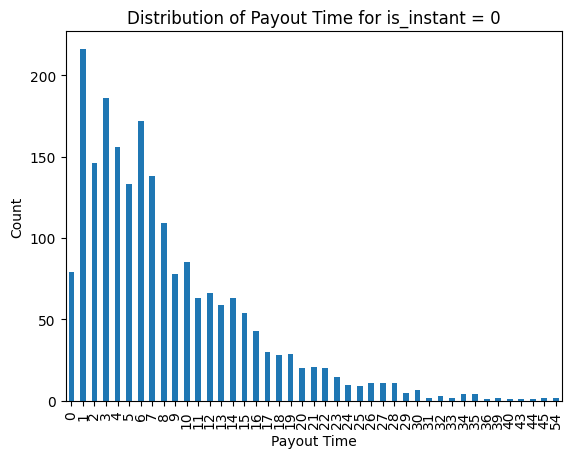

In [42]:
filtered_df = df3[df3['is_instant'] == 0]

filtered_df['payout_time'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Payout Time')
plt.ylabel('Count')
plt.title('Distribution of Payout Time for is_instant = 0')
plt.show()

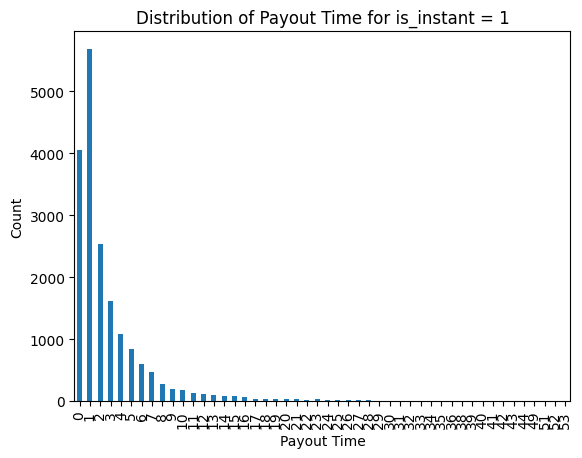

In [43]:
filtered_df_1 = df3[df3['is_instant'] == 1]
filtered_df_1['payout_time'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Payout Time')
plt.ylabel('Count')
plt.title('Distribution of Payout Time for is_instant = 1')
plt.show()

These distributions are right skwed and a median or mode might be a better description of the distribution but it is clear that most loans for instant type are cleared within 2 days and on average 8 days the normal one has a wider tail while the instant one looks like an exponential sharp decay.

Of course other statistics like percentiles could be computed to give a better understanding of the distributions

In [44]:
cross_tab = pd.crosstab(index=[df3['bank_id'], df3['is_instant']], columns=df3['payout_time'])

proportions = cross_tab.div(cross_tab.sum(axis=1), axis=0)

proportions

payout_time               0         1         2         3         4   \
bank_id is_instant                                                     
500     0.0         0.000000  0.000000  0.000000  0.250000  0.000000   
        1.0         0.156250  0.312500  0.125000  0.156250  0.093750   
501     0.0         0.000000  0.000000  0.250000  0.250000  0.000000   
        1.0         0.302326  0.302326  0.139535  0.116279  0.000000   
502     0.0         0.200000  0.000000  0.200000  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
998     1.0         0.175000  0.250000  0.200000  0.075000  0.100000   
999     0.0         0.000000  0.000000  0.000000  0.000000  0.000000   
        1.0         0.294118  0.235294  0.205882  0.058824  0.088235   
1000    0.0         0.000000  0.000000  0.000000  0.000000  0.166667   
        1.0         0.228571  0.314286  0.142857  0.057143  0.085714   

payout_time               5         6         7         8         9   \
bank_id is_instant                                                     
500     0.0         0.000000  0.000000  0.250000  0.250000  0.000000   
        1.0         0.031250  0.031250  0.000000  0.031250  0.000000   
501     0.0         0.000000  0.250000  0.000000  0.000000  0.000000   
        1.0         0.023256  0.046512  0.000000  0.000000  0.000000   
502     0.0         0.000000  0.000000  0.000000  0.000000  0.200000   
...                      ...       ...       ...       ...       ...   
998     1.0         0.025000  0.050000  0.000000  0.050000  0.025000   
999     0.0         0.000000  0.000000  0.000000  0.000000  0.000000   
        1.0         0.000000  0.000000  0.058824  0.029412  0.029412   
1000    0.0         0.000000  0.000000  0.000000  0.166667  0.000000   
        1.0         0.085714  0.028571  0.057143  0.000000  0.000000   

payout_time               10        11        12        13    14   15   16  \
bank_id is_instant                                                           
500     0.0         0.000000  0.000000  0.000000  0.000000  0.25  0.0  0.0   
        1.0         0.000000  0.000000  0.000000  0.000000  0.00  0.0  0.0   
501     0.0         0.000000  0.000000  0.000000  0.250000  0.00  0.0  0.0   
        1.0         0.000000  0.023256  0.000000  0.046512  0.00  0.0  0.0   
502     0.0         0.000000  0.000000  0.400000  0.000000  0.00  0.0  0.0   
...                      ...       ...       ...       ...   ...  ...  ...   
998     1.0         0.000000  0.000000  0.025000  0.000000  0.00  0.0  0.0   
999     0.0         1.000000  0.000000  0.000000  0.000000  0.00  0.0  0.0   
        1.0         0.000000  0.000000  0.000000  0.000000  0.00  0.0  0.0   
1000    0.0         0.166667  0.000000  0.166667  0.000000  0.00  0.0  0.0   
        1.0         0.000000  0.000000  0.000000  0.000000  0.00  0.0  0.0   

payout_time          17   18       19   20   21        22       23   24  \
bank_id is_instant                                                        
500     0.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   
        1.0         0.0  0.0  0.03125  0.0  0.0  0.000000  0.03125  0.0   
501     0.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   
        1.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   
502     0.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   
...                 ...  ...      ...  ...  ...       ...      ...  ...   
998     1.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   
999     0.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   
        1.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   
1000    0.0         0.0  0.0  0.00000  0.0  0.0  0.166667  0.00000  0.0   
        1.0         0.0  0.0  0.00000  0.0  0.0  0.000000  0.00000  0.0   

payout_time               25   26   27     28   29   30   31   32   33   34  \
bank_id is_instant                                      

### Relation to other columns
* Provide some insights about how the payout time is related to the occupation, branch and purpose of the applicant?
* What can you infer from the above information?
* The findings from this task are for both technical and non-technical audience. So please consider what would be the best way to present your insights.

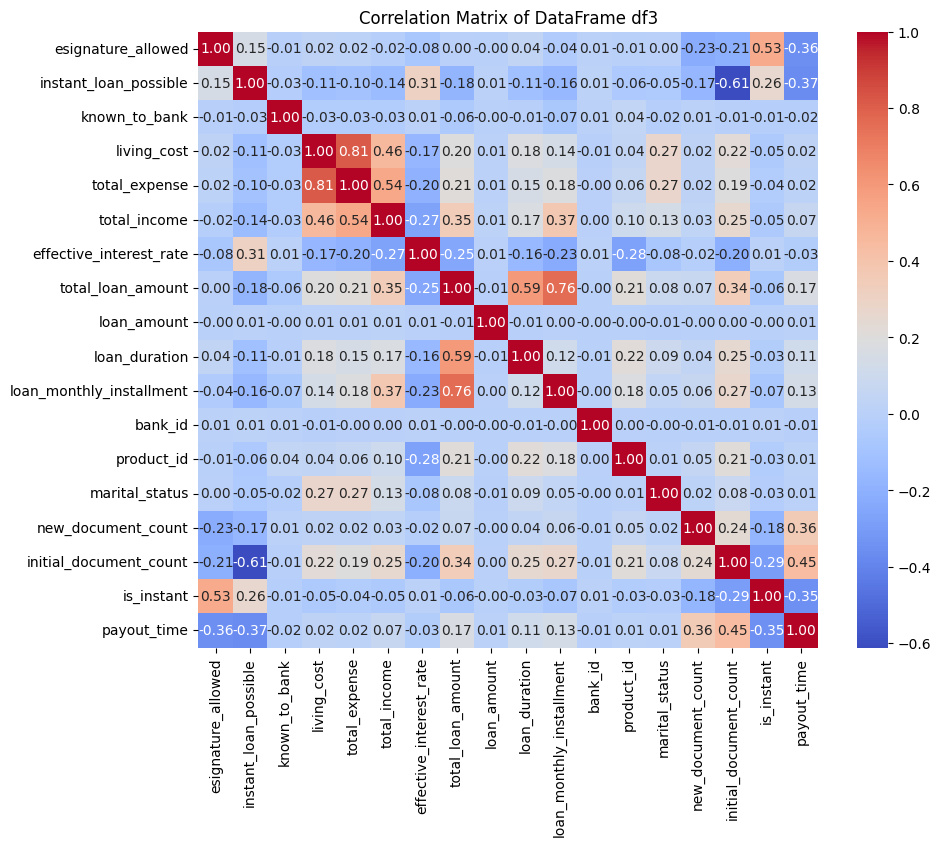

In [45]:
# consider only numeric columns
numeric_columns = df3.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of DataFrame df3')
plt.show()

1. Payout_time is the target variable and we see that is_instant is negatively correlated as expected meaning normal loans take longer 
2. number of documents are positively correlated indicating more the number of documents the bank requires longer the payment time since it might reflect a riskier customer
3. The living cost, total expense and total income are all closely coorelated positively
4. Esignatures are related to instant loans and the possiblity of getting them so they are negatively correlated with payout_time which means that if the bank accepts esignatures and has high confidence in the customer it would provide a loan immediately

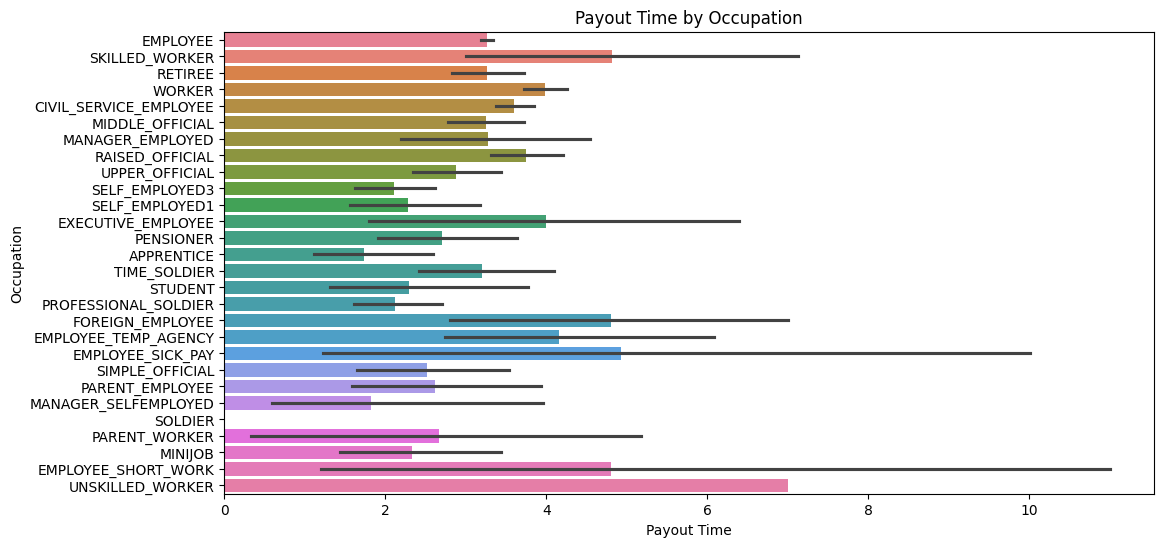

In [46]:
plt.figure(figsize=(12, 6))

sns.barplot(y='occupation_group', x='payout_time', hue='occupation_group', data=df3, orient='h')

plt.ylabel('Occupation')
plt.xlabel('Payout Time')
plt.title('Payout Time by Occupation')

plt.show()

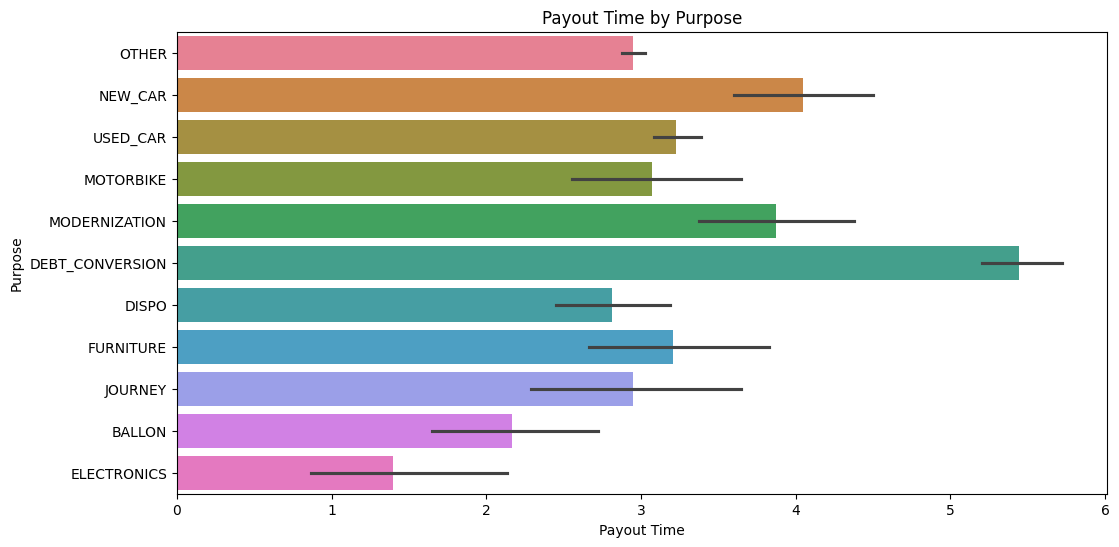

In [47]:
plt.figure(figsize=(12, 6))

sns.barplot(y='purpose', x='payout_time', hue='purpose', data=df3, orient='h')

plt.ylabel('Purpose')
plt.xlabel('Payout Time')
plt.title('Payout Time by Purpose')

plt.show()

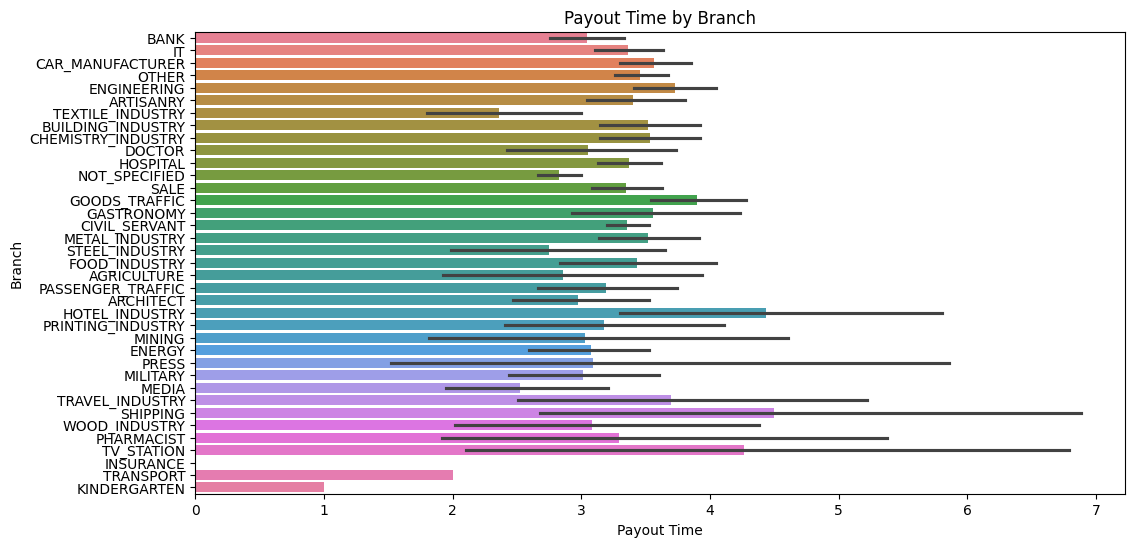

In [48]:
plt.figure(figsize=(12, 6))

sns.barplot(y='branch', x='payout_time', hue='branch', data=df3, orient='h')

plt.ylabel('Branch')
plt.xlabel('Payout Time')
plt.title('Payout Time by Branch')

plt.show()

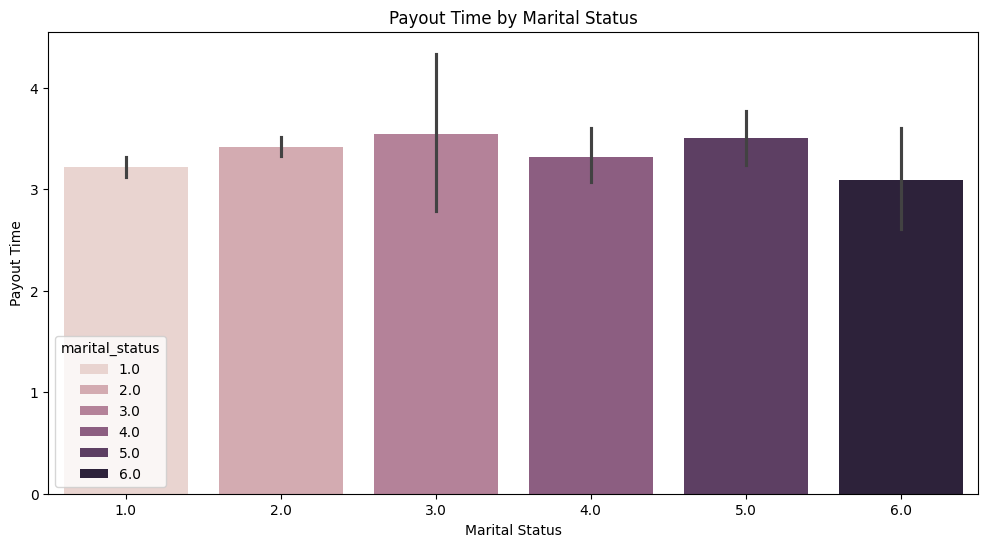

In [49]:
plt.figure(figsize=(12, 6))

sns.barplot(x='marital_status', y='payout_time', hue='marital_status', data=df3)

plt.xlabel('Marital Status')
plt.ylabel('Payout Time')
plt.title('Payout Time by Marital Status')

plt.show()

### Some other things to analyze
* What are some of the other things that you can think of analyzing to understand the payout time better?
* For this, you don't need to implement anything, just describe your thoughts.

Other important things might include

1. Previous loans and loan history such as SCHUFA score
2. Debts with banks
3. Time spent on the website browsing
4. Previous unsuccesful attempts
5. Some form of risk score to see the sources of money spent and how frequently are the loan requests made 

# Task 3

### Model Training
* Build a model for predicting the payout date for a loan request.
* Feel free to engineer your own features.
* Additionally, your manager has also asked you to not use any "black-box" model, i.e. the model results and behavior should be as explainable as possible.

In [50]:
df3.columns

Index(['esignature_allowed', 'instant_loan_possible', 'known_to_bank',
       'living_cost', 'total_expense', 'total_income', 'loan_creation_time',
       'effective_interest_rate', 'total_loan_amount', 'loan_amount',
       'loan_duration', 'loan_monthly_installment', 'bank_id', 'product_id',
       'purpose', 'nationality', 'marital_status', 'occupation_group',
       'branch', 'identification_started_at', 'identification_completed_at',
       'bank_closed_offer_at', 'bank_received_doc_first_at',
       'new_document_count', 'initial_document_count',
       'applicant_submitted_doc_at', 'is_instant', 'payout_time'],
      dtype='object')

To remove bias we do not consider nationality and marital status which has almost uniform distribution and consider the target variable as payout_time

In [51]:
y = df3.payout_time
X = df3.drop(['nationality', 'marital_status', 'payout_time','identification_started_at', 'identification_completed_at',
       'bank_closed_offer_at', 'bank_received_doc_first_at', 'applicant_submitted_doc_at', 'loan_creation_time', 'bank_id', 'product_id'], axis = 1)

In [52]:
X.head()

,esignature_allowed,instant_loan_possible,known_to_bank,living_cost,total_expense,total_income,effective_interest_rate,total_loan_amount,loan_amount,loan_duration,loan_monthly_installment,purpose,occupation_group,branch,new_document_count,initial_document_count,is_instant
0,0,0,0,1050.0,1850.0,2514.0,5.99,3162.85,2384,18.0,175.63,OTHER,EMPLOYEE,BANK,0.0,3.0,0.0
1,1,0,0,1400.0,1480.0,4300.0,10.09,15135.36,1818,96.0,157.66,OTHER,EMPLOYEE,IT,1.0,2.0,0.0
2,1,0,0,2050.0,2340.0,3940.0,4.99,33979.23,2453,60.0,565.00,NEW_CAR,EMPLOYEE,CAR_MANUFACTURER,1.0,1.0,1.0
3,1,0,0,700.0,1540.0,2850.0,10.77,7254.15,2164,24.0,302.26,OTHER,EMPLOYEE,OTHER,0.0,1.0,1.0
4,1,0,0,2400.0,4775.0,5200.0,5.73,12162.40,2716,84.0,144.70,OTHER,EMPLOYEE,IT,0.0,2.0,0.0


In [53]:
X.dtypes

esignature_allowed            int64
instant_loan_possible         int64
known_to_bank                 int64
living_cost                 float64
total_expense               float64
total_income                float64
effective_interest_rate     float64
total_loan_amount           float64
loan_amount                   int64
loan_duration               float64
loan_monthly_installment    float64
purpose                      object
occupation_group             object
branch                       object
new_document_count          float64
initial_document_count      float64
is_instant                  float64
dtype: object

In [54]:
X_enc = pd.get_dummies(X, drop_first=True)

In [55]:
X_enc.dtypes

esignature_allowed           int64
instant_loan_possible        int64
known_to_bank                int64
living_cost                float64
total_expense              float64
                            ...   
branch_TEXTILE_INDUSTRY       bool
branch_TRANSPORT              bool
branch_TRAVEL_INDUSTRY        bool
branch_TV_STATION             bool
branch_WOOD_INDUSTRY          bool
Length: 87, dtype: object

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=123)


In [57]:
X_train[:5]

,esignature_allowed,instant_loan_possible,known_to_bank,living_cost,total_expense,total_income,effective_interest_rate,total_loan_amount,loan_amount,loan_duration,loan_monthly_installment,new_document_count,initial_document_count,is_instant,purpose_DEBT_CONVERSION,purpose_DISPO,purpose_ELECTRONICS,purpose_FURNITURE,purpose_JOURNEY,purpose_MODERNIZATION,purpose_MOTORBIKE,purpose_NEW_CAR,purpose_OTHER,purpose_USED_CAR,occupation_group_CIVIL_SERVICE_EMPLOYEE,occupation_group_EMPLOYEE,occupation_group_EMPLOYEE_SHORT_WORK,occupation_group_EMPLOYEE_SICK_PAY,occupation_group_EMPLOYEE_TEMP_AGENCY,occupation_group_EXECUTIVE_EMPLOYEE,occupation_group_FOREIGN_EMPLOYEE,occupation_group_MANAGER_EMPLOYED,occupation_group_MANAGER_SELFEMPLOYED,occupation_group_MIDDLE_OFFICIAL,occupation_group_MINIJOB,occupation_group_PARENT_EMPLOYEE,occupation_group_PARENT_WORKER,occupation_group_PENSIONER,occupation_group_PROFESSIONAL_SOLDIER,occupation_group_RAISED_OFFICIAL,occupation_group_RETIREE,occupation_group_SELF_EMPLOYED1,occupation_group_SELF_EMPLOYED3,occupation_group_SIMPLE_OFFICIAL,occupation_group_SKILLED_WORKER,occupation_group_SOLDIER,occupation_group_STUDENT,occupation_group_TIME_SOLDIER,occupation_group_UNSKILLED_WORKER,occupation_group_UPPER_OFFICIAL,occupation_group_WORKER,branch_ARCHITECT,branch_ARTISANRY,branch_BANK,branch_BUILDING_INDUSTRY,branch_CAR_MANUFACTURER,branch_CHEMISTRY_INDUSTRY,branch_CIVIL_SERVANT,branch_DOCTOR,branch_ENERGY,branch_ENGINEERING,branch_FOOD_INDUSTRY,branch_GASTRONOMY,branch_GOODS_TRAFFIC,branch_HOSPITAL,branch_HOTEL_INDUSTRY,branch_INSURANCE,branch_IT,branch_KINDERGARTEN,branch_MEDIA,branch_METAL_INDUSTRY,branch_MILITARY,branch_MINING,branch_NOT_SPECIFIED,branch_OTHER,branch_PASSENGER_TRAFFIC,branch_PHARMACIST,branch_PRESS,branch_PRINTING_INDUSTRY,branch_SALE,branch_SHIPPING,branch_STEEL_INDUSTRY,branch_TEXTILE_INDUSTRY,branch_TRANSPORT,branch_TRAVEL_INDUSTRY,branch_TV_STATION,branch_WOOD_INDUSTRY
13854,1,0,0,1700.0,2750.0,3130.0,6.38,59408.33,1159,84.0,707.40,0.0,1.0,1.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4916,1,0,0,1700.0,2460.0,2400.0,6.39,16074.00,2855,84.0,192.00,0.0,1.0,1.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4156,1,0,0,1700.0,1807.0,3050.0,3.49,7910.78,2725,36.0,219.70,0.0,4.0,1.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2590,1,1,0,700.0,700.0,1233.0,9.29,3744.00,2843,48.0,78.01,0.0,1.0,1.0,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
13459,1,0,0,170

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)

X_test_s = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_s, y_train)

y_pred_rf = rf_model.predict(X_test_s)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rf)


In [ ]:
rf_importances = rf_model.feature_importances_
feature_names = X_enc.columns
rf_importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_importances.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(data = rf_importances[:10], x = 'Importance', y = 'Feature')

In [ ]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train_s, y_train)

y_pred_xgb = xgb_model.predict(X_test_s)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", mse_xgb)

In [ ]:
xgb_importances = xgb_model.feature_importances_
feature_names = X_enc.columns
xgb_importances = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances})
xgb_importances.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(data = xgb_importances[:10], x = 'Importance', y = 'Feature')

In [ ]:
import statsmodels.api as sm
import numpy as np

X_test_bias = np.c_[np.ones(X_test_s.shape[0]), X_test_s]
X_train_bias = sm.add_constant(X_train_s)

glm_model = sm.GLM(y_train, X_train_bias, family=sm.families.Gaussian())
glm_results = glm_model.fit()

y_pred_glm = glm_results.predict(X_test_bias)

print(glm_results.summary())

In [ ]:
beta_coefficients = glm_results.params

print(beta_coefficients)

In [ ]:
coefficients = glm_results.params[1:]  # Exclude the intercept term

sorted_indices = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients.iloc[sorted_indices]

# Extract feature names from X_train
feature_names = X_train.columns

# Reorder feature names based on sorted indices
sorted_feature_names = feature_names[sorted_indices]

# Plot the coefficients with feature names
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[-10:], sorted_coefficients[-10:], color='skyblue')  # Plot the top 20 features
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()


### Model Evaluation
* How good is the prediction quality of your model?
* How do you know if it's good or not?
* Can you compare it to some very simple baseline?
* What are some of the most important features for your model?

Initial document count, new document count, esignature allowed and instant_loan possible seem to be consistent features that are important for the model.
while GLM have greater interpretability a R squared value of 0.43 is quite poor indicating that only 42 % of the variance in payout time is explained by the model which is expected as most of the features have non linear relationships.

The high deviance and low log likelihood show that this might not be the best model.
But at least the features that effect payout times are clear 

Since we are doing a regression model we could compare the payout time the model predicts with the mean or median times and see if we are doing better or worse than the averages and the model is really customised. 

### Possible Further Improvements
* What further steps could you imagine for improving the prediction quality of the model?
* For this, you don't need to implement these steps, just describe them.
* Consider that you have unlimited time and resources and there's no restriction on what kind of modelling approach you can use.

1. Ensemble models could be used to understand predictions 
2. Grid based searches could be employed to improve quality
3. Regularization and feature engineering might also be useful.

I would use tree based ensemble methods when the input space is large ... in our case was around 87 dimensional and a grid search approach with hyperparameter tuning to get the best results and then compare it with baseline or random models 

# END OF THE NOTEBOOK
Thank you for your hard work!